In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.preprocessing import StandardScaler


In [2]:
df = pd.read_csv('fraud.csv')

In [3]:
print(df.shape)

(555719, 23)


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             555719 non-null  int64  
 1   trans_date_trans_time  555719 non-null  object 
 2   cc_num                 555719 non-null  float64
 3   merchant               555719 non-null  object 
 4   category               555719 non-null  object 
 5   amt                    555719 non-null  float64
 6   first                  555719 non-null  object 
 7   last                   555719 non-null  object 
 8   gender                 555719 non-null  object 
 9   street                 555719 non-null  object 
 10  city                   555719 non-null  object 
 11  state                  555719 non-null  object 
 12  zip                    555719 non-null  int64  
 13  lat                    555719 non-null  float64
 14  long                   555719 non-nu

In [5]:
df.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [6]:
obj_features = df.select_dtypes(np.object_).columns
obj_features

Index(['trans_date_trans_time', 'merchant', 'category', 'first', 'last',
       'gender', 'street', 'city', 'state', 'job', 'dob', 'trans_num'],
      dtype='object')

In [7]:
h_cardinality = [var for var in obj_features if df[var].nunique() > 100 and var != 'trans_date_trans_time']
h_cardinality

['merchant', 'first', 'last', 'street', 'city', 'job', 'dob', 'trans_num']

In [8]:
df.drop(h_cardinality, axis=1, inplace=True)
df.drop('Unnamed: 0', axis=1, inplace=True)

In [9]:
df.drop('cc_num', axis=1, inplace=True)

In [10]:
df.drop('trans_date_trans_time', axis=1, inplace=True)

In [11]:
df.drop('long', axis=1, inplace=True)
df.drop('lat', axis=1, inplace=True)
df.drop('zip', axis=1, inplace=True)

In [12]:
df.info()
df.category

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   category    555719 non-null  object 
 1   amt         555719 non-null  float64
 2   gender      555719 non-null  object 
 3   state       555719 non-null  object 
 4   city_pop    555719 non-null  int64  
 5   unix_time   555719 non-null  int64  
 6   merch_lat   555719 non-null  float64
 7   merch_long  555719 non-null  float64
 8   is_fraud    555719 non-null  int64  
dtypes: float64(3), int64(3), object(3)
memory usage: 38.2+ MB


0          personal_care
1          personal_care
2         health_fitness
3               misc_pos
4                 travel
               ...      
555714    health_fitness
555715         kids_pets
555716         kids_pets
555717            travel
555718     entertainment
Name: category, Length: 555719, dtype: object

In [13]:
df.head()

,category,amt,gender,state,city_pop,unix_time,merch_lat,merch_long,is_fraud
0,personal_care,2.86,M,SC,333497,1371816865,33.986391,-81.200714,0
1,personal_care,29.84,F,UT,302,1371816873,39.450498,-109.960431,0
2,health_fitness,41.28,F,NY,34496,1371816893,40.495810,-74.196111,0
3,misc_pos,60.05,M,FL,54767,1371816915,28.812398,-80.883061,0
4,travel,3.19,M,MI,1126,1371816917,44.959148,-85.884734,0


In [14]:
y = df["is_fraud"]
print(f"Number fraud={np.count_nonzero(y)}, Number non-fraud={len(y)-np.sum(y)}")
print(f"Only {np.sum(y)/len(y)*100}% of samples are fraud")
X = df.drop("is_fraud", axis=1)

Number fraud=2145, Number non-fraud=553574
Only 0.3859864427885316% of samples are fraud


In [15]:
X.category = X.category.astype('category').cat.codes
X.gender = X.gender.astype('category').cat.codes
X.state= X.state.astype('category').cat.codes

In [16]:
X.head()

,category,amt,gender,state,city_pop,unix_time,merch_lat,merch_long
0,10,2.86,1,39,333497,1371816865,33.986391,-81.200714
1,10,29.84,0,43,302,1371816873,39.450498,-109.960431
2,5,41.28,0,33,34496,1371816893,40.495810,-74.196111
3,9,60.05,1,8,54767,1371816915,28.812398,-80.883061
4,13,3.19,1,21,1126,1371816917,44.959148,-85.884734


In [17]:
from imblearn.under_sampling import RandomUnderSampler

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.10, random_state=123)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.20, random_state=123)

In [18]:
X.shape

(555719, 8)

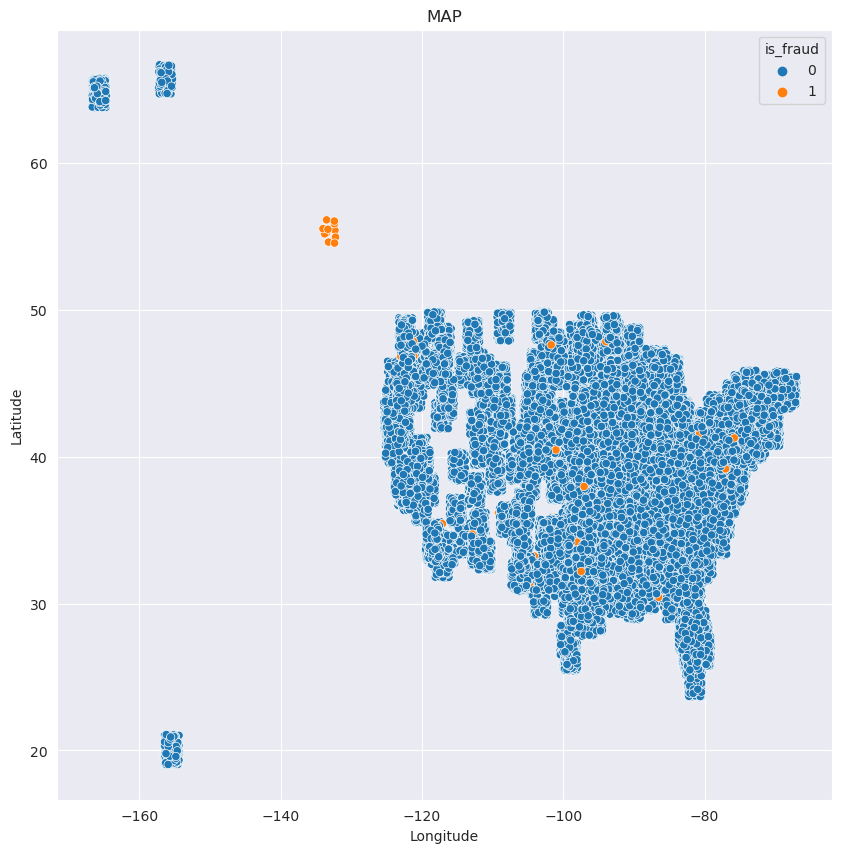

In [19]:
# Assuming 'high_cardinality' contains the names of the features
plt.figure(figsize=(10, 10))
m = sns.scatterplot(data = X_train, x = 'merch_long', y = 'merch_lat',hue = y_train)  #alpha controls the transparency of markers
plt.title('MAP')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
#plt.legend(title='Neighbourhood_group')
plt.show()

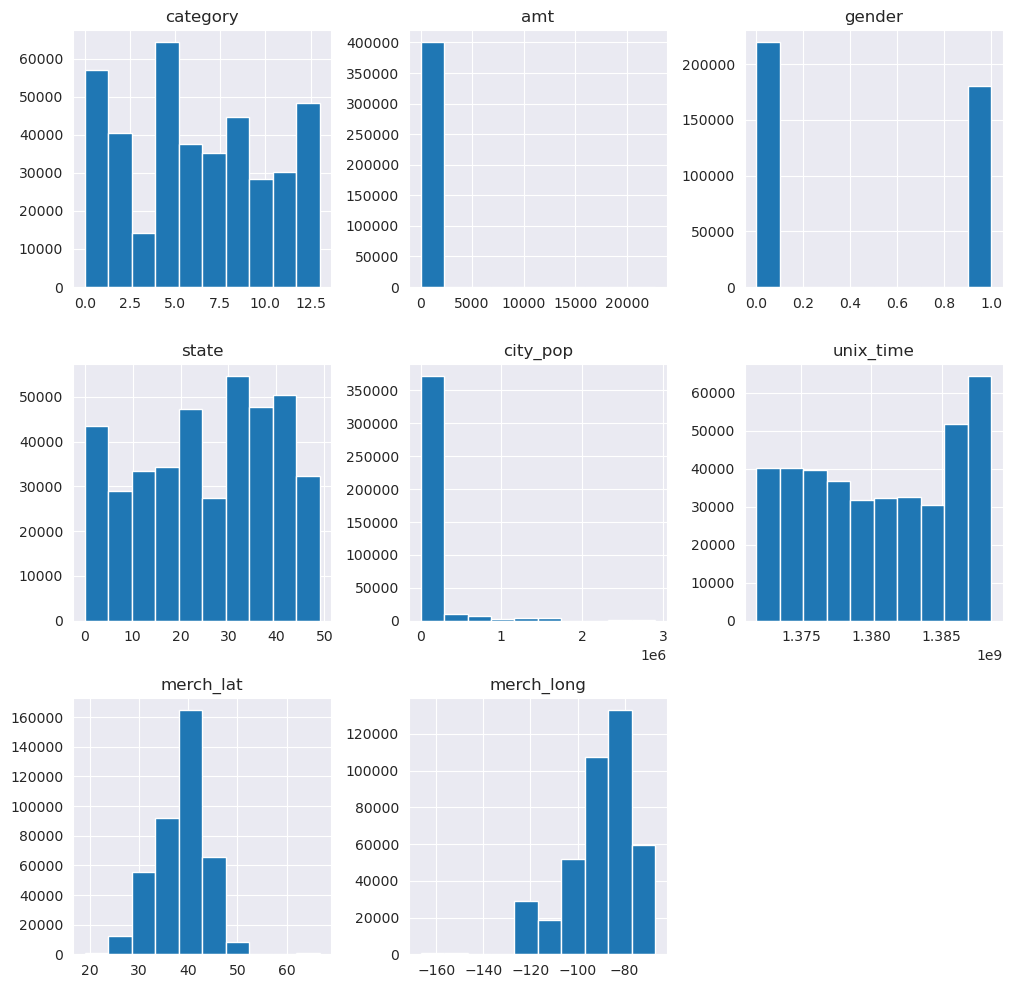

In [20]:
num_features = [feature for feature in X_train.columns]
X_train[num_features].hist(figsize = (12, 12));

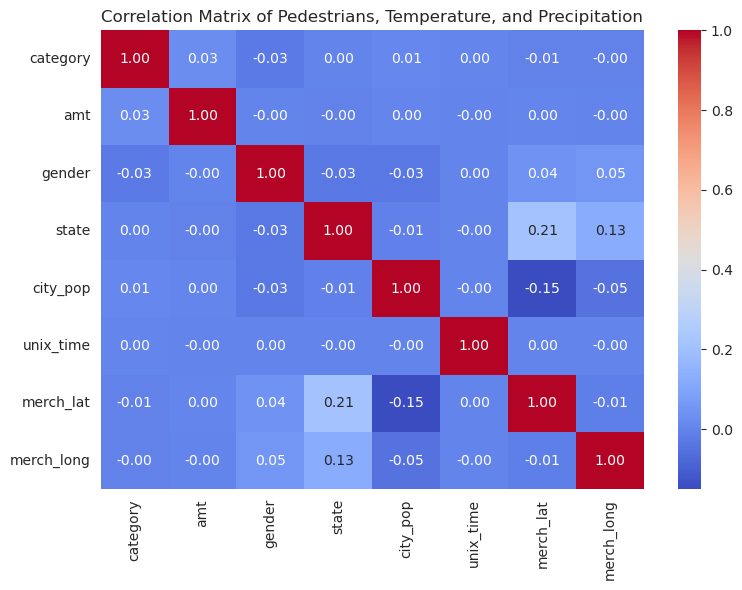

In [21]:
correlation_matrix = X_train[[i for i in num_features]].corr() 
plt.figure(figsize=(8, 6)) 
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f") 
plt.title('Correlation Matrix of Pedestrians, Temperature, and Precipitation') 
plt.tight_layout() 
plt.show()

In [22]:

# smote = SMOTE(random_state=42)
scaler=StandardScaler()
scaler.fit(X)
X_train= scaler.transform(X_train)
X_test= scaler.transform(X_test)
X_val = scaler.transform(X_val)

sampler = RandomUnderSampler(random_state=42)
X_train, y_train = sampler.fit_resample(X_train, y_train)
X_train.shape


(3090, 8)

In [23]:
from sklearn.metrics import *
from sklearn.svm import SVC

svm = SVC(kernel='poly', C=0.1 , random_state=42)
svm.fit(X_train, y_train)

y_train_pred = svm.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)
train_loss = log_loss(y_train, y_train_pred)
print("Training Accuracy:", train_accuracy)
print("Training Precision:", train_precision)
print("Training recall:", train_recall)
print("Train loss: ", train_loss)

Training Accuracy: 0.7533980582524272
Training Precision: 0.966626936829559
Training recall: 0.5249190938511327
Train loss:  8.888434913432773


In [24]:
y_val_pred = svm.predict(X_val)
val_accuracy = accuracy_score(y_val, y_val_pred)
val_precision = precision_score(y_val, y_val_pred)
val_recall = recall_score(y_val, y_val_pred)
val_loss = log_loss(y_val, y_val_pred)
print("val Accuracy:", val_accuracy)
print("val Precision:", val_precision)
print("val recall:", val_recall)
print("val loss:", val_loss)

val Accuracy: 0.9834349695091472
val Precision: 0.11835026897788405
val recall: 0.5210526315789473
val loss: 0.5970642173924537


In [25]:
1-np.sum(y_train)/len(y_train)

0.5

In [26]:
weights=svm.coef_
print(weights)

AttributeError: coef_ is only available when using a linear kernel

In [ ]:
cm = confusion_matrix(y_val, y_val_pred, labels=svm.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=svm.classes_)
disp.plot()
plt.show()